<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Bias_%26_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bias**

*   **Definition**: Bias refers to the simplifying assumptions made by a model to make the target function easier to learn. In simpler terms, it's the error introduced by approximating a real-world problem, which may be complex, by a simplified model. A high-bias model is too simple and cannot capture the underlying patterns in the data.
*   **Characteristics of High Bias (Underfitting)**:
    *   **Oversimplification**: The model fails to capture relevant relations between features and target outputs.
    *   **Poor Performance**: High error rates on both training and test data.
    *   **Ignoring Data**: The model pays too little attention to the training data.
    *   **Example**: Using a linear regression model to fit data that has a quadratic relationship. The linear model is too simple to capture the curve, leading to high bias.
*   **Effects**: Leads to *underfitting*, where the model performs poorly on unseen data because it hasn't learned the basic relationships from the training data.

### **Variance**

*   **Definition**: Variance refers to the model's sensitivity to small fluctuations or noise in the training data. A high-variance model learns the training data and its noise too precisely, making it perform poorly on new, unseen data.
*   **Characteristics of High Variance (Overfitting)**:
    *   **Over-complexity**: The model captures noise in the training data as if they were actual patterns.
    *   **Good Training, Poor Test Performance**: Very low error on training data but high error on test data.
    *   **Sensitivity**: The model changes significantly with small changes in the training data.
    *   **Example**: Using a very complex decision tree (deeply grown) that perfectly memorizes the training data, including its noise. When new data comes in, it performs poorly because it generalized poorly from the training set.
*   **Effects**: Leads to *overfitting*, where the model performs exceptionally well on the training data but fails to generalize to new, unseen data.

### **The Bias-Variance Trade-off**

*   **The Dilemma**: Bias and variance are inversely related. It's often impossible to minimize both simultaneously. Increasing model complexity typically reduces bias but increases variance. Conversely, simplifying a model increases bias but reduces variance.
*   **Goal**: The aim in machine learning is to find the right balance (the "sweet spot") between bias and variance to minimize the total error. This total error can often be broken down as:

    *   **Total Error = Bias² + Variance + Irreducible Error**

    The irreducible error is the noise in the data itself that no model can capture.

### **How to Address Bias and Variance**

**To Reduce Bias (Address Underfitting)**:
*   **Increase Model Complexity**: Use a more complex model (e.g., polynomial regression instead of linear, a deeper neural network).
*   **Add More Features**: Provide more relevant features to the model.
*   **Reduce Regularization**: If using regularization techniques (L1, L2), decrease their strength.
*   **Feature Engineering**: Create new features that better capture the underlying relationships.
*   **Use a Different Algorithm**: Switch to an algorithm that is inherently more flexible.

**To Reduce Variance (Address Overfitting)**:
*   **Get More Training Data**: More data helps the model generalize better.
*   **Reduce Model Complexity**: Use a simpler model (e.g., linear regression instead of polynomial, a shallower neural network).
*   **Feature Selection/Dimensionality Reduction**: Remove irrelevant features or use techniques like PCA.
*   **Increase Regularization**: Apply regularization techniques (L1, L2, Dropout) to penalize complexity.
*   **Early Stopping**: For iterative algorithms, stop training when performance on a validation set starts to degrade.
*   **Ensemble Methods**: Use techniques like Bagging (e.g., Random Forests) which average predictions from multiple models to reduce variance.

### **Visual Analogy**

Imagine a dartboard:
*   **High Bias, Low Variance**: Darts are consistently clustered together, but far from the bullseye. The model is consistent but consistently wrong.
*   **Low Bias, High Variance**: Darts are scattered all over the board, but some hit the bullseye. The model is trying to hit the target, but is highly inconsistent.
*   **High Bias, High Variance**: Darts are scattered far from the bullseye.
*   **Low Bias, Low Variance**: Darts are consistently clustered around the bullseye. This is the ideal scenario.

Understanding and managing the bias-variance trade-off is central to developing effective machine learning models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
np.random.seed(42)

X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.3, size=X.shape)


Train Models with Different Complexity

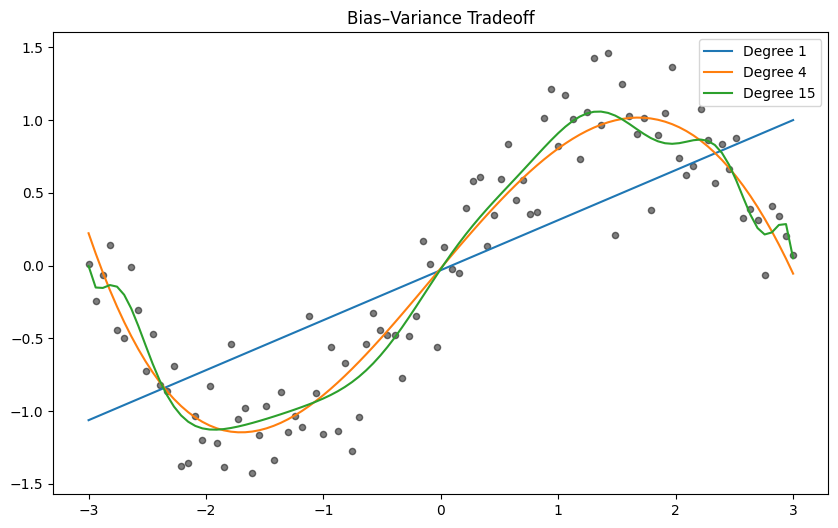

In [3]:
degrees = [1, 4, 15]
plt.figure(figsize=(10, 6))

for d in degrees:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("lr", LinearRegression())
    ])
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, label=f"Degree {d}")

plt.scatter(X, y, color="black", s=20, alpha=0.5)
plt.legend()
plt.title("Bias–Variance Tradeoff")
plt.show()


Measure Training vs Test Error

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

for d in [1, 4, 15]:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("lr", LinearRegression())
    ])
    model.fit(X_train, y_train)

    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))

    print(f"Degree {d}: Train MSE={train_mse:.3f}, Test MSE={test_mse:.3f}")


Degree 1: Train MSE=0.309, Test MSE=0.257
Degree 4: Train MSE=0.079, Test MSE=0.055
Degree 15: Train MSE=0.065, Test MSE=0.080


Visual Bias–Variance Curve

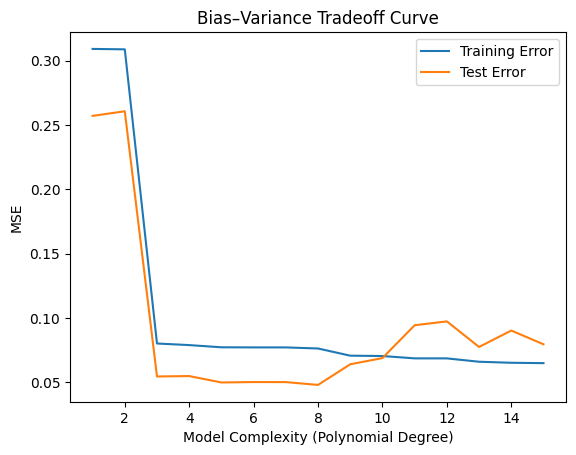

In [5]:
train_errors = []
test_errors = []

for d in range(1, 16):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("lr", LinearRegression())
    ])
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(range(1, 16), train_errors, label="Training Error")
plt.plot(range(1, 16), test_errors, label="Test Error")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("MSE")
plt.legend()
plt.title("Bias–Variance Tradeoff Curve")
plt.show()


#KNN Bias–Variance Tradeoff

1️⃣ Create a Non-Linear Dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


2️⃣ Train KNN with Different Values of K

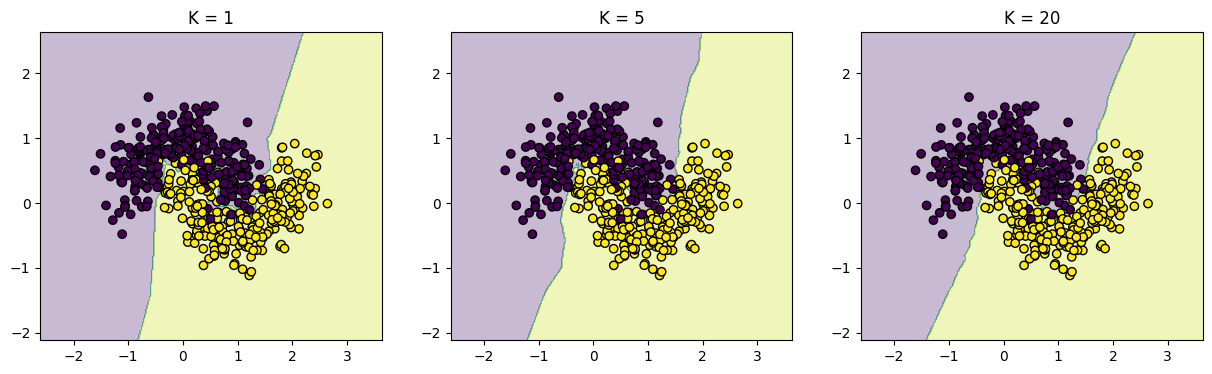

In [7]:
k_values = [1, 5, 20]
plt.figure(figsize=(15, 4))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Decision boundary
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
    )
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
    plt.title(f"K = {k}")

plt.show()


4️⃣ Quantify Bias–Variance Using Accuracy

In [8]:
train_acc = []
test_acc = []

K = range(1, 31)

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, knn.predict(X_train)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test)))


5️⃣ Bias–Variance Curve

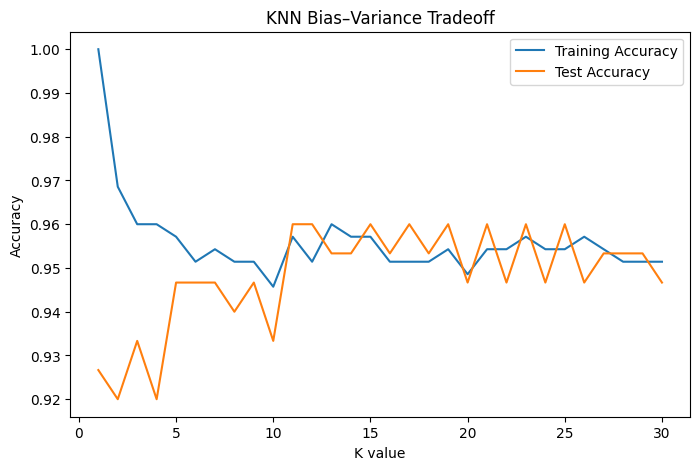

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(K, train_acc, label="Training Accuracy")
plt.plot(K, test_acc, label="Test Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.title("KNN Bias–Variance Tradeoff")
plt.show()
